In [8]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

plt.rcParams.update({'axes.labelsize':10, 
                     'xtick.labelsize':6, 
                     'ytick.labelsize':6, 
                    })

In [2]:
img_reference = pilimg.open('./pic2.jpg')
img_reference = np.array(img_reference)
# plt.imshow(img_reference)
# plt.show(block=False)

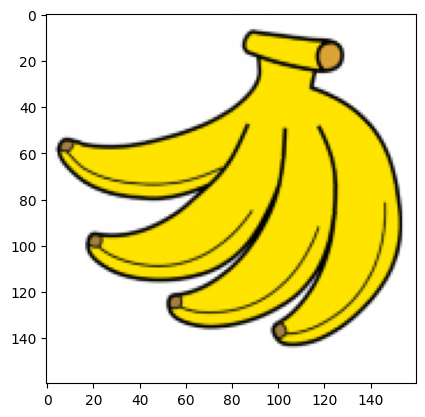

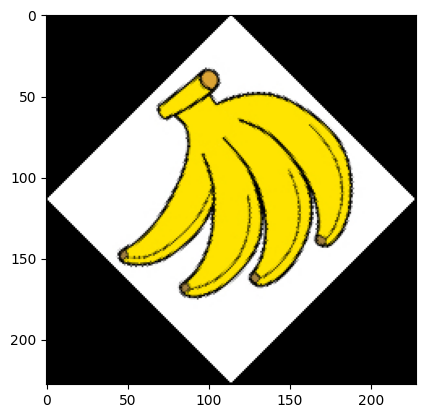

In [19]:
pil_template = pilimg.open('./pic2-2.jpg')
img_template = np.array(pil_template)
plt.imshow(img_template)
plt.show(block=False)

# pil_template = pilimg.open('./pic2-2.jpg')
img_template_rot = np.array(pil_template.rotate(30, fillcolor='white'))
# img_template_rot180 = np.array(pil_template.rotate(180))
# img_template_rot270 = np.array(pil_template.rotate(270))
plt.imshow(img_template_rot45)
plt.show()
# plt.imshow(img_template_rot180)
# plt.show()
# plt.imshow(img_template_rot270)
# plt.show()

In [4]:
def CrossCorrelation2d(img1, img2, scale=[1.0], rotate=[0]):
    
    # check image shape mismatch
    if img1.shape[2]!=img2.shape[2]:
        print("Image channel mismatch!")
        return
    if (img1.shape[0]-img2.shape[0])*(img1.shape[1]-img2.shape[1])<0:
        print("Image shape mismatch!")
        return
    
    # check validity of parameters
    if len(scale)==0:
        print("Parameter 'scale' must have at least 1 elements! (default=[1.0])")
        return
    for s in scale:
        if s<=0.:
            print("Element in parameter 'scale' must have positive float number, got", s)
            return
    if len(rotate)==0:
        print("Parameter 'rotate' must have at least 1 elements! (default=[0])")
        return
    
    # Determine image size
    img_small = None
    img_large = None
    if img1.shape[0]<img2.shape[0]:
        img_small = img1
        img_large = img2
    else:
        img_small = img2
        img_large = img1
    img_reference_original = img_large.copy()
    
    
    ## Preprocessing
    
    # Convert image data type
    img_small = img_small.astype(np.int32)
    img_large = img_large.astype(np.int32)
    
    # Define image width and height
    height_small = img_small.shape[0]
    width_small = img_small.shape[1]
    height_large = img_large.shape[0]
    width_large = img_large.shape[1]
    depth = img_small.shape[2]
    
    img_small_trans = np.zeros((len(scale), len(rotate), height_small, width_small, depth), dtype=np.int32)
    for s in range(scale):
        for r in range(rotate):
            img_small_trans
        
    # xy flip small image => Convolution
#     img_small = img_small[::-1,::-1,:]
    
    # Add padding to large image as the edge value
    img_large = np.concatenate([
#         np.zeros((height_small-1, img_large.shape[1], depth), dtype=img_large.dtype),
        np.repeat(img_large[:1,:,:], repeats=height_small-1, axis=0),
        img_large, 
#         np.zeros((height_small-1, img_large.shape[1], depth), dtype=img_large.dtype)
        np.repeat(img_large[-1:,:,:], repeats=height_small-1, axis=0)
    ], axis=0)
    img_large = np.concatenate([
#         np.zeros((img_large.shape[0], width_small-1, depth), dtype=img_large.dtype),
        np.repeat(img_large[:,:1,:], repeats=width_small-1, axis=1),
        img_large,
#         np.zeros((img_large.shape[0], width_small-1, depth), dtype=img_large.dtype)
        np.repeat(img_large[:,-1:,:], repeats=width_small-1, axis=1)
    ], axis=1)
    
    # Plot reference, padded reference, template image
    fig, axes = plt.subplots(1, 3, figsize=(12,8), gridspec_kw={'width_ratios':[width_large,img_large.shape[1],width_small]})
    axes[0].imshow(img_reference_original)
    axes[0].set_title('reference image')
    axes[1].imshow(img_large)
    axes[1].set_title('padded reference image')
    axes[2].imshow(img_small)
    axes[2].set_title('template image')
    plt.show(block=False)
    
    # Standardize images
    img_large = (img_large - np.mean(img_large)) / np.std(img_large)
    img_small = (img_small - np.mean(img_small)) / np.std(img_small)
    
    # Compute Normalized Cross-Correlation (NCC)
    corr_result = np.zeros((height_large+height_small-1, width_large+width_small-1))
#     img_small_normalize_term = np.sqrt(np.sum(img_small*img_small))
    img_small_norm = np.linalg.norm(img_small.reshape((-1)))
#     img_small_std = np.std(img_small)
#     img_small_mean = np.mean(img_small)
#     img_small_pixel = img_small.shape[0] * img_small.shape[1] * img_small.shape[2]
    for row in tqdm(range(height_large+height_small-1)):
        for col in range(width_large+width_small-1):
            img_large_crop = img_large[row:row+height_small, col:col+width_small, :]
#             corr_result[row,col] = np.sum(img_large_crop * img_small) \
#                 / (np.sqrt(np.sum(img_large_crop*img_large_crop)) * img_small_normalize_term)
#             corr_result[row,col] = np.sum((img_large_crop-np.mean(img_large_crop)) * (img_small-img_small_mean)) / (np.std(img_large_crop) * img_small_std * img_small_pixel)
#             corr_result[row,col] = np.sum(img_large_crop * img_small) / (img_small_pixel)
#             corr_result[row,col] = np.sum(img_large_crop*img_small) / (np.sqrt(np.sum(img_large_crop*img_large_crop))*img_small_normalize_term)
            corr_result[row,col] = np.sum(img_large_crop*img_small) / (np.linalg.norm(img_large_crop.reshape((-1)))*img_small_norm)
        
    # Plot result array as image
#     fig, axes = plt.subplots(1, 2, figsize=(12,8))
#     pimg_result = axes[0].imshow(corr_result, cmap=cm.rainbow)
#     axes[0].set_title('NCC result')
#     plt.colorbar(pimg_result, ax=axes[0])

    # Get coordinate info of cross-correlation result from largest value 
    y_coord, x_coord = np.unravel_index(np.argsort(corr_result.reshape((-1)))[::-1], corr_result.shape)
    
    # Select coordinate with cross-correlation value larger than the threshold
    threshold = 0.8
    y_coord = y_coord[:len(np.where(corr_result>threshold)[0])]
    x_coord = x_coord[:len(np.where(corr_result>threshold)[0])]

    # Modify coordinate value from padded image to original image shape
    y_coord = y_coord - height_small + 1
    x_coord = x_coord - width_small + 1

    # Save boxed area to avoid duplicated boxes
    img_reference_boxed = np.zeros((height_large, width_large), dtype=np.bool_)

    # Draw box at found location in image
    axes[1].imshow(img_reference_original)
    for x, y in zip(x_coord, y_coord):
        if img_reference_boxed[y,x] or img_reference_boxed[y,x+width_small] or img_reference_boxed[y+height_small,x] or img_reference_boxed[y+height_small,x+width_small]:
            continue
        axes[1].plot((x, x), (y, y+height_small), '-', color='red')
        axes[1].plot((x+width_small, x+width_small), (y, y+height_small), '-', color='red')
        axes[1].plot((x, x+width_small), (y, y), '-', color='red')
        axes[1].plot((x, x+width_small), (y+height_small, y+height_small), '-', color='red')
        img_reference_boxed[y:y+height_small+1, x:x+width_small+1] = True
    axes[1].set_title('template boxed reference image')
    plt.show()
    
    return corr_result

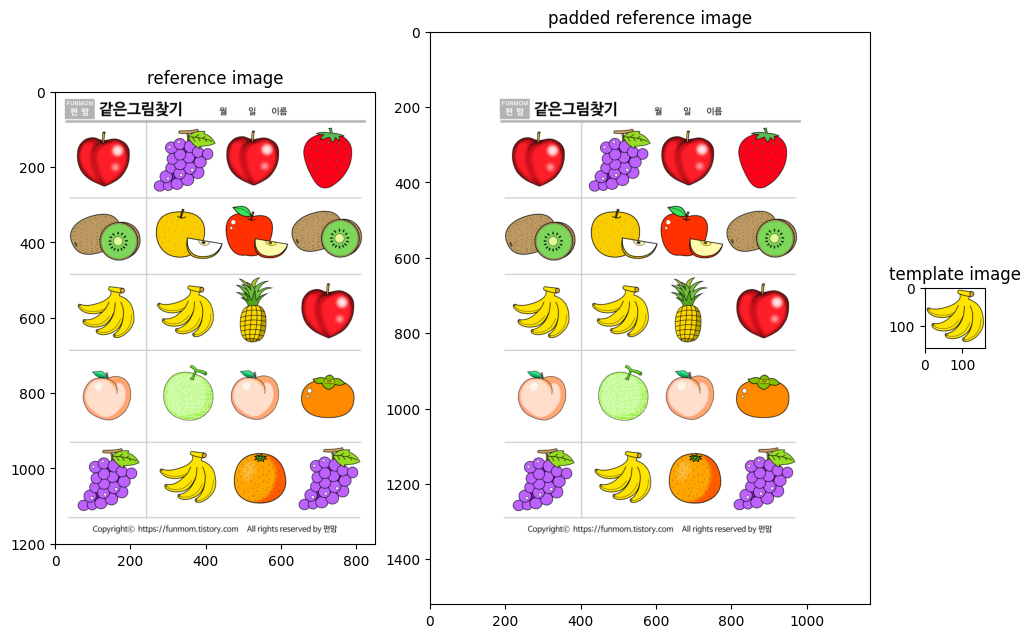

100%|███████████████████████████████████████| 1361/1361 [04:20<00:00,  5.22it/s]


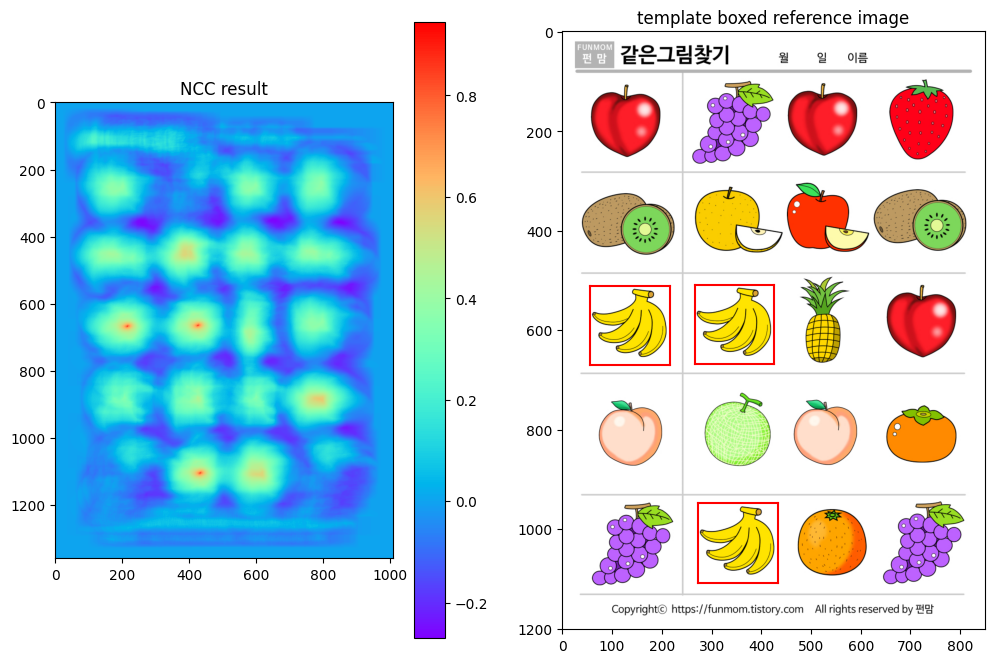

In [5]:
corr_result = CrossCorrelation2d(img_reference, img_template)

In [6]:
# fig, axes = plt.subplots(2)
# i1 = axes[0].imshow(corr_result, cmap=cm.rainbow)
# axes[0].set_title('NCC result')
# # fig.colorbar(i1, cax=cax)p
# plt.colorbar(i1, ax=axes[0])




# # ax = plt.figure().add_subplot(projection='3d')
# # # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# # x = np.arange(corr_result.shape[0])
# # y = np.arange(corr_result.shape[1])
# # X, Y = np.meshgrid(y, x)
# # surf = ax.plot_surface(Y, X, corr_result, cmap=cm.rainbow)
# # plt.colorbar(surf).set_ticks([-1.0,-0.5,0,0.5,1.0])
# # ax.view_init(0,90)


# height_small = img_template.shape[0]
# width_small = img_template.shape[1]
# height_large = img_reference.shape[0]
# width_large = img_reference.shape[1]

# plt.imshow(img_reference)

# img_reference_boxed = np.zeros((height_large, width_large), dtype=np.bool_)

# y_coord, x_coord = np.unravel_index(np.argsort(corr_result.reshape((-1)))[::-1], corr_result.shape)
    
# threshold = 0.8
# y_coord = y_coord[:len(np.where(corr_result>threshold)[0])]
# x_coord = x_coord[:len(np.where(corr_result>threshold)[0])]


# # Draw box at found location in image
# for x, y in zip(x_coord, y_coord):
#     if img_reference_boxed[y,x] or img_reference_boxed[y,x+width_small] or img_reference_boxed[y+height_small,x] or img_reference_boxed[y+height_small,x+width_small]:
#         continue
#     plt.plot((x, x), (y, y+height_small), '-', color='red')
#     plt.plot((x+width_small, x+width_small), (y, y+height_small), '-', color='red')
#     plt.plot((x, x+width_small), (y, y), '-', color='red')
#     plt.plot((x, x+width_small), (y+height_small, y+height_small), '-', color='red')
#     img_reference_boxed[y:y+height_small+1, x:x+width_small+1] = True
# # plt.title('reference image with found template boxed')


# plt.show()

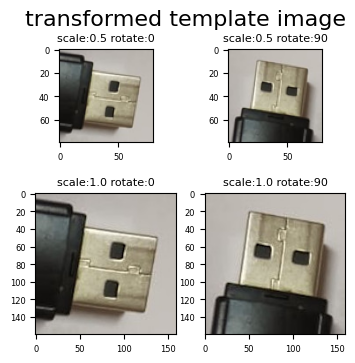

 19%|███████▌                                | 241/1280 [00:46<03:22,  5.14it/s]


KeyboardInterrupt: 

In [25]:
img1_pil = pilimg.open('./pic3.jpg')
img2_pil = pilimg.open('./pic3-1.jpg')
rotate=[0, 90]
scale=[0.5, 1.0]
img1 = np.array(img1_pil)
img2 = np.array(img2_pil)

# check image shape mismatch
if img1.shape[2]!=img2.shape[2]:
    print("Image channel mismatch!")
    
if (img1.shape[0]-img2.shape[0])*(img1.shape[1]-img2.shape[1])<0:
    print("Image shape mismatch!")

# check validity of parameters
if len(scale)==0:
    print("Parameter 'scale' must have at least 1 elements! (default=[1.0])")
for s in scale:
    if s<=0.:
        print("Element in parameter 'scale' must have positive float number, got", s)
if len(rotate)==0:
    print("Parameter 'rotate' must have at least 1 elements! (default=[0])")

# Determine image size
img_small = None
img_large = None
if img1.shape[0]<img2.shape[0]:
    img_small = img1
    img_large = img2
else:
    img_small = img2
    img_large = img1
img_reference_original = img_large.copy()


## Preprocessing

# Convert image data type
img_small = img_small.astype(np.int32)
img_large = img_large.astype(np.int32)

# Define image width and height
height_small = img_small.shape[0]
width_small = img_small.shape[1]
height_large = img_large.shape[0]
width_large = img_large.shape[1]
depth = img_small.shape[2]

# Define variables
scaled_size_list = []
for s in scale:
    scaled_size_list.append((int(height_small*s), int(width_small*s)))
scale_len = len(scale)
rotate_len = len(rotate)

# Apply scaling and rotation to template image and show transformed images
fig, axes = plt.subplots(scale_len, rotate_len, figsize=(2*rotate_len,2*scale_len), squeeze=False, gridspec_kw={'height_ratios':[h for (h,w) in scaled_size_list]})
img_small_trans = []
for si, s in enumerate(scale):
    temp_trans = np.zeros((rotate_len, scaled_size_list[si][0], scaled_size_list[si][1], depth), dtype=np.int32)
    for ri, r in enumerate(rotate):
        temp_trans[ri] = np.array(img2_pil.resize(scaled_size_list[si]).rotate(r, fillcolor=(img_small[0,0,0],img_small[0,0,1],img_small[0,0,2])))
        axes[si,ri].imshow(temp_trans[ri])
        axes[si,ri].set_title(f'scale:{s} rotate:{r}', fontsize=8)
    img_small_trans.append(temp_trans)
fig.suptitle('transformed template image', fontsize=16)
plt.show(block=False)

img_large = img_large - np.mean(img_large, dtype=np.float64)
for si in range(scale_len):
    for ri in range(rotate_len):
        img_small_trans[si][ri] = img_small_trans[si][ri] - np.mean(img_small_trans[si][ri], dtype=np.float64)


# Compute Normalized Cross-Correlation (NCC)
corr_result = []
for si in range(scale_len):
    corr_result.append(np.zeros((rotate_len, height_large-scaled_size_list[si][0]+1, width_large-scaled_size_list[si][1]+1), dtype=np.float64))
img_small_norm_list = np.zeros((scale_len, rotate_len), dtype=np.float64)
for si in range(scale_len):
    for ri in range(rotate_len):
        img_small_norm_list[si,ri] = np.linalg.norm(img_small_trans[si][ri].reshape((-1)))
for row in tqdm(range(height_large)):
    for col in range(width_large):
        for si in range(scale_len):
            if row+scaled_size_list[si][0] > height_large or col+scaled_size_list[si][1] > width_large:
                continue
            img_large_crop = img_large[row:row+scaled_size_list[si][0], col:col+scaled_size_list[si][1], :]
            img_large_crop_norm = np.linalg.norm(img_large_crop.reshape((-1)))
            for ri in range(rotate_len):
                corr_result[si][ri, row, col] = np.sum(img_large_crop*img_small_trans[si][ri], dtype=np.float64) / (img_large_crop_norm * img_small_norm_list[si, ri])

# Plot result array as image
fig, axes = plt.subplots(scale_len, rotate_len, figsize=(4*rotate_len,4*scale_len), squeeze=False)
for si, s in enumerate(scale):
    for ri, r in enumerate(rotate):
        tax = axes[si,ri].imshow(corr_result[si][ri], cmap=cm.rainbow, vmin=-1., vmax=1.)
        plt.colorbar(tax, ax=axes[si,ri])
        axes[si,ri].set_title(f'scale:{s} rotate:{r}', fontsize=8)
fig.suptitle('NCC result', fontsize=16)
plt.show(block=False)

# find boxes 
threshold = 0.7
img_reference_boxed = np.zeros((height_large, width_large), dtype=np.bool_)
plt.imshow(img_reference_original)
for si in range(scale_len):
    height_small_curr, width_small_curr = scaled_size_list[si]
    for ri in range(rotate_len):
        y_coord, x_coord = np.unravel_index(np.argsort(corr_result[si][ri].reshape((-1)))[::-1], corr_result[si][ri].shape)
        y_coord = y_coord[:len(np.where(corr_result[si][ri]>threshold)[0])]
        x_coord = x_coord[:len(np.where(corr_result[si][ri]>threshold)[0])]
        for x, y in zip(x_coord, y_coord):
            if img_reference_boxed[y,x] \
                or img_reference_boxed[y,x+width_small_curr-1] \
                or img_reference_boxed[y+height_small_curr-1,x] \
                or img_reference_boxed[y+height_small_curr-1,x+width_small_curr-1]:
                continue
            plt.plot((x, x), (y, y+height_small_curr), '-', color='red')
            plt.plot((x+width_small_curr, x+width_small_curr), (y, y+height_small_curr), '-', color='red')
            plt.plot((x, x+width_small_curr), (y, y), '-', color='red')
            plt.plot((x, x+width_small_curr), (y+height_small_curr, y+height_small_curr), '-', color='red')
            img_reference_boxed[y:y+height_small_curr, x:x+width_small_curr] = True
plt.title(f'Template Matching Result (threshold={threshold})')
plt.show()
